# Bibliotecas

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [276]:
pd.set_option('display.max_columns', 100) 
%matplotlib inline

sns.set_style('darkgrid')

# Base de dados

In [277]:
dados = pd.read_csv('dados/BancoDeDados.csv')

In [278]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [279]:
dados.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,pedido_aprovado,pedido_entregador,pedido_entregue,data_estimada,id_vendedor,preco,frete,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,15.62,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,7c67e1448b00f6e969d365cea6b010ab,106.99,30.59,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


# Análise Exploratória

In [280]:
import ydata_profiling

In [281]:
# ProfileReport(dados)

In [282]:
def grafico(col,data, titulo=None):
    plt.figure(figsize=(12,6))
    plt.title(titulo, fontsize=16, loc='left')
    plt.ylabel('Contagem', fontsize=12)
    sns.countplot(x= col, data=data, orient='h');

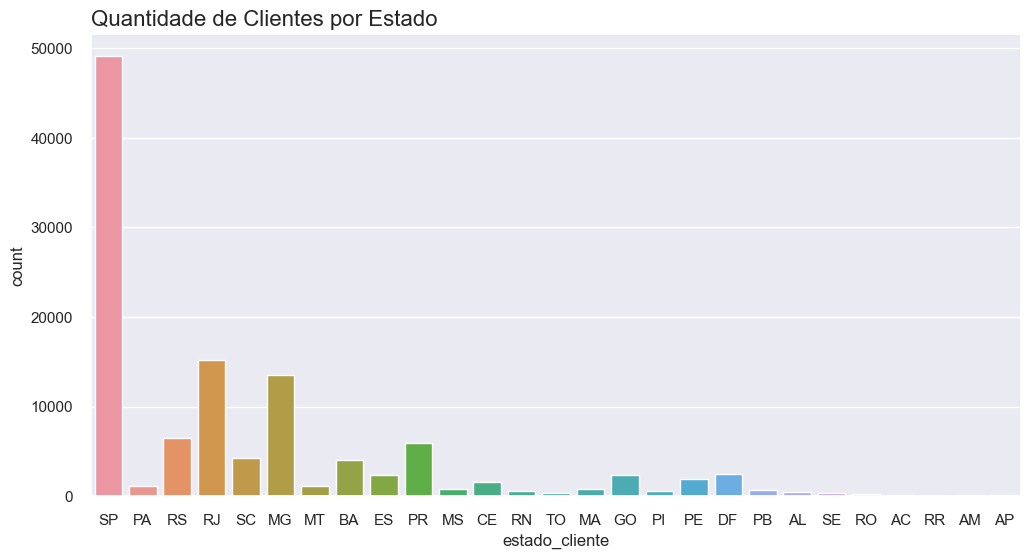

In [283]:
grafico('estado_cliente',dados, 'Quantidade de Clientes por Estado')

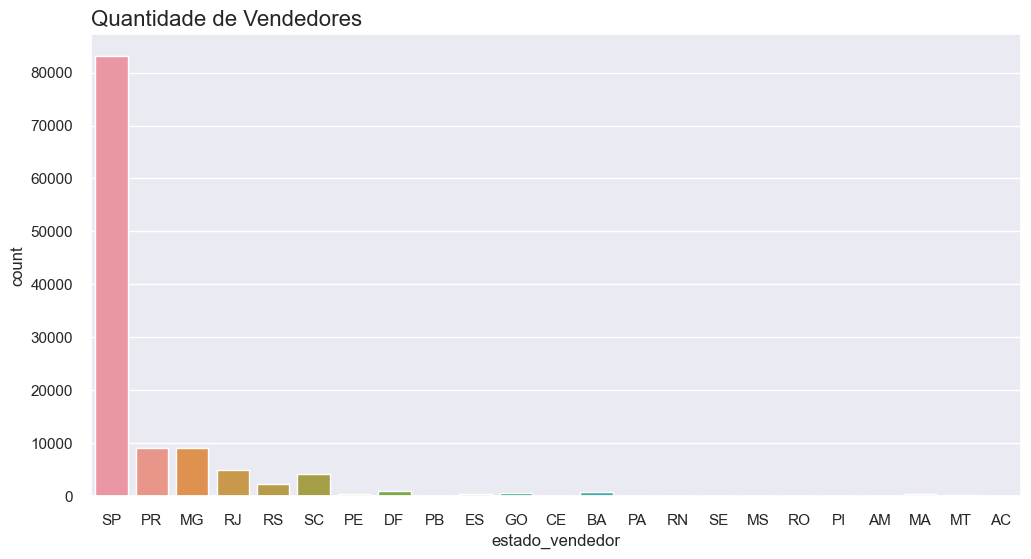

In [284]:
grafico('estado_vendedor',dados, 'Quantidade de Vendedores')

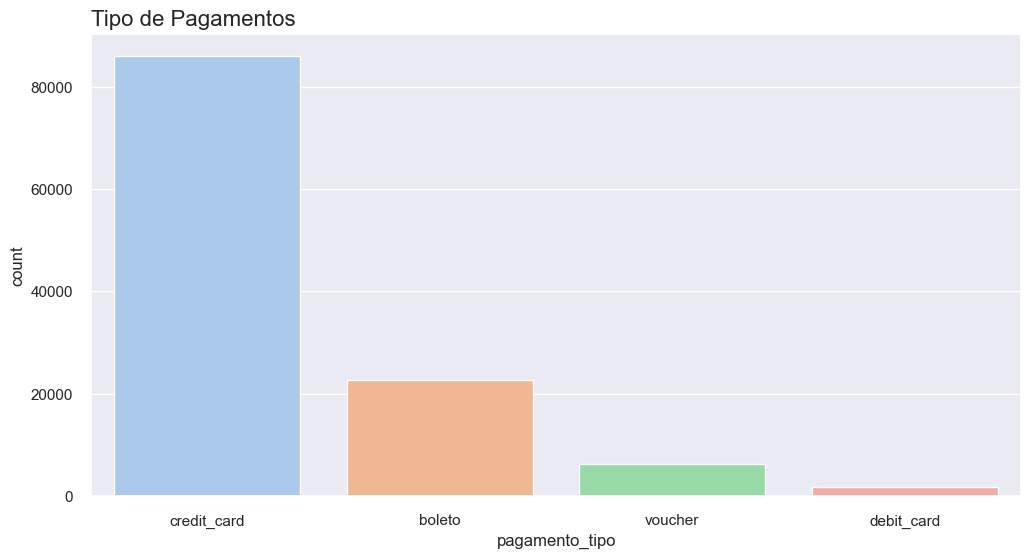

In [285]:
grafico('pagamento_tipo',dados, 'Tipo de Pagamentos')

# Modelo RFM


* Recência - Há quantos dias foi a útima compra do cliente ?
* Frequência - Quantas compras esse cliente já fez na sua empresa, desde que se cadastrou?
* Monetariedade - Quanto esse cliente já gastou em dinheiro na sua compra ?

In [286]:
dados.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,pedido_aprovado,pedido_entregador,pedido_entregue,data_estimada,id_vendedor,preco,frete,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,15.62,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,7c67e1448b00f6e969d365cea6b010ab,106.99,30.59,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [287]:
dados_olist = dados[['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco']]
dados_olist

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99
...,...,...,...,...,...
116576,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49
116577,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00
116578,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90


In [288]:
df_compra = dados.groupby('id_unico_cliente').horario_pedido.max().reset_index()
df_compra.columns = ['id_unico_cliente', 'DataMaxCompra']
df_compra['DataMaxCompra'] = pd.to_datetime(df_compra['DataMaxCompra'])

In [289]:
df_compra['recencia'] = (df_compra['DataMaxCompra'].max() - df_compra['DataMaxCompra']).dt.days

In [290]:
df_usuario = pd.merge(dados_olist, df_compra, on='id_unico_cliente')
df_usuario

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,DataMaxCompra,recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,2017-05-16 15:05:35,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,2017-11-09 00:50:13,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,2017-11-09 00:50:13,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,2017-05-07 20:11:26,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,2018-02-03 19:45:40,211
...,...,...,...,...,...,...,...
116576,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,2018-08-21 11:29:05,12
116577,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,2018-07-23 18:35:14,41
116578,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,2018-07-23 18:35:14,41
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,2018-07-28 17:55:27,36


In [291]:
df_frequencia = dados.groupby('id_unico_cliente').pedido_aprovado.count().reset_index()
df_frequencia.columns = ['id_unico_cliente', 'frequencia']

In [292]:
df_usuario = df_usuario.merge(df_frequencia, on='id_unico_cliente')

In [293]:
df_receita = dados.groupby('id_unico_cliente')['pagamento_valor'].sum().reset_index()
df_receita.columns = ['id_unico_cliente', 'receita']

In [294]:
df_usuario = df_usuario.merge(df_receita, on='id_unico_cliente')

In [295]:
df_usuario

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,DataMaxCompra,recencia,frequencia,receita
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,2017-05-16 15:05:35,474,1,146.87
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,2017-11-09 00:50:13,298,2,551.58
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,2017-11-09 00:50:13,298,2,551.58
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,2017-05-07 20:11:26,483,1,140.61
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,2018-02-03 19:45:40,211,1,137.58
...,...,...,...,...,...,...,...,...,...
116576,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,2018-08-21 11:29:05,12,1,314.32
116577,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,2018-07-23 18:35:14,41,2,169.26
116578,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,2018-07-23 18:35:14,41,2,169.26
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,2018-07-28 17:55:27,36,1,77.50


## Clusterização

In [296]:
from sklearn.cluster import KMeans

### Descobrindo o melhor k

In [297]:
def melhor_k(data):
    wcss = []
    
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    plt.title('Regra do Cotovelo')
    plt.ylabel('WCSS')
    plt.xlabel('Nº Clusters')
    sns.lineplot(wcss)
    

    print(f'Nº de ideal de clusters: {distances.index(max(distances)) + 2}')
    return 

In [298]:
from sklearn.preprocessing import StandardScaler

recencia_scaler = StandardScaler()

df_recencia_scaler = recencia_scaler.fit_transform(df_usuario[['recencia']])
df_recencia_scaler

array([[ 1.51101081],
       [ 0.36152293],
       [ 0.36152293],
       ...,
       [-1.31699062],
       [-1.34964653],
       [-1.51945724]])

Nº de ideal de clusters: 4


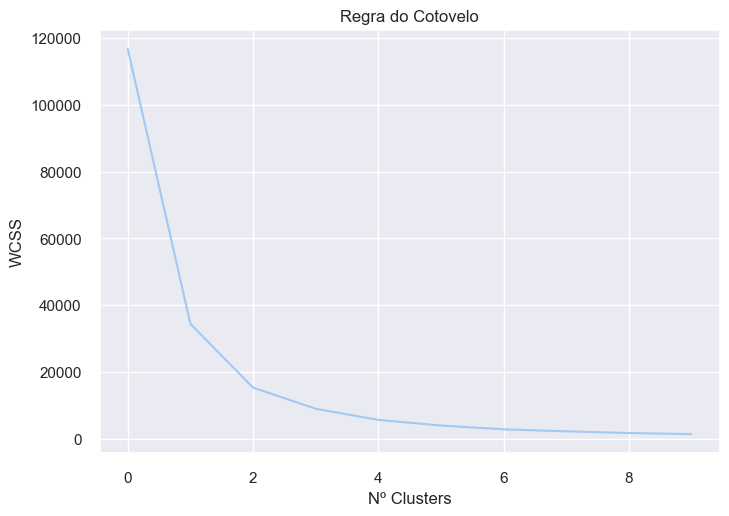

In [299]:
melhor_k(df_recencia_scaler)

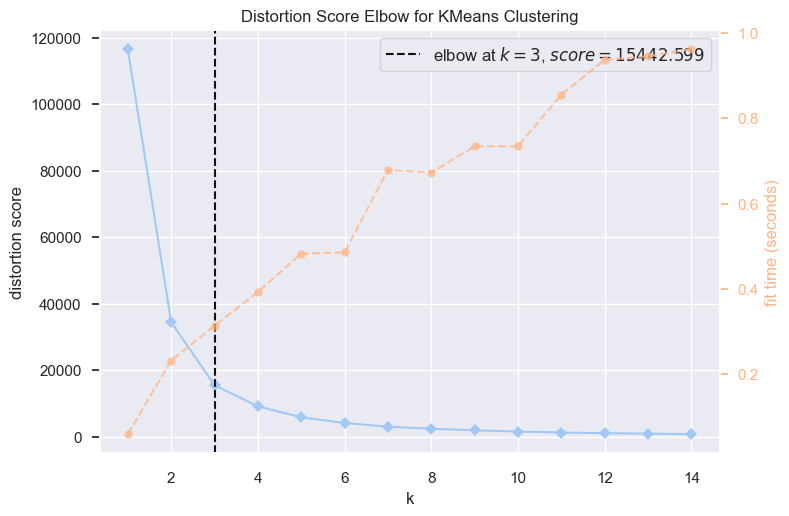

In [300]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,15))
visualizer.fit(df_recencia_scaler)
visualizer.show();

In [301]:
df_usuario

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,DataMaxCompra,recencia,frequencia,receita
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,2017-05-16 15:05:35,474,1,146.87
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,2017-11-09 00:50:13,298,2,551.58
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,2017-11-09 00:50:13,298,2,551.58
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,2017-05-07 20:11:26,483,1,140.61
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,2018-02-03 19:45:40,211,1,137.58
...,...,...,...,...,...,...,...,...,...
116576,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,2018-08-21 11:29:05,12,1,314.32
116577,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,2018-07-23 18:35:14,41,2,169.26
116578,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,2018-07-23 18:35:14,41,2,169.26
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,2018-07-28 17:55:27,36,1,77.50


In [302]:
def score(data, col, asc=True):
    kmeans = KMeans(n_clusters=4)
    labels_recencia = kmeans.fit_predict(data[[col]])
    
    data2 = data.copy()
    data2[f'{col}_label'] = labels_recencia

    agrupando = data2.groupby(f'{col}_label')[col].mean().sort_values(ascending=asc).reset_index()
    
    agrupando[f'{col}_cluster'] = agrupando.index
    print(agrupando)
    
    juntando_cluster = pd.merge(data2, agrupando[[f'{col}_label', f'{col}_cluster']], on=f'{col}_label')
    juntando_cluster.drop(f'{col}_label', axis=1, inplace=True)
    
    return juntando_cluster

In [303]:
novo_df = score(df_usuario, 'recencia', False)
novo_df

   recencia_label    recencia  recencia_cluster
0               3  490.622269                 0
1               0  320.233294                 1
2               1  187.911204                 2
3               2   66.790878                 3


,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,DataMaxCompra,recencia,frequencia,receita,recencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,2017-05-16 15:05:35,474,1,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,2017-05-07 20:11:26,483,1,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,2017-03-23 15:10:17,528,1,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,2017-05-16 10:00:49,474,1,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,2017-03-18 23:04:36,533,1,148.33,0
...,...,...,...,...,...,...,...,...,...,...
116576,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,2018-08-21 11:29:05,12,1,314.32,3
116577,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,2018-07-23 18:35:14,41,2,169.26,3
116578,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,2018-07-23 18:35:14,41,2,169.26,3
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,2018-07-28 17:55:27,36,1,77.50,3


In [304]:
novo_df = score(novo_df, 'frequencia', True)
novo_df

   frequencia_label  frequencia  frequencia_cluster
0                 0    1.306343                   0
1                 3    5.644432                   1
2                 2   21.489740                   2
3                 1   75.000000                   3


,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,DataMaxCompra,recencia,frequencia,receita,recencia_cluster,frequencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,2017-05-16 15:05:35,474,1,146.87,0,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,2017-05-07 20:11:26,483,1,140.61,0,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,2017-03-23 15:10:17,528,1,142.05,0,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,2017-05-16 10:00:49,474,1,155.70,0,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,2017-03-18 23:04:36,533,1,148.33,0,0
...,...,...,...,...,...,...,...,...,...,...,...
116576,9a736b248f67d166d2fbb006bcb877c3,270c23a11d024a44c896d1894b261a83,2017-08-08 20:26:31,3,83.80,2017-08-08 20:26:31,390,75,556.13,1,3
116577,9a736b248f67d166d2fbb006bcb877c3,270c23a11d024a44c896d1894b261a83,2017-08-08 20:26:31,3,83.80,2017-08-08 20:26:31,390,75,556.13,1,3
116578,9a736b248f67d166d2fbb006bcb877c3,270c23a11d024a44c896d1894b261a83,2017-08-08 20:26:31,3,83.80,2017-08-08 20:26:31,390,75,556.13,1,3
116579,9a736b248f67d166d2fbb006bcb877c3,270c23a11d024a44c896d1894b261a83,2017-08-08 20:26:31,3,83.80,2017-08-08 20:26:31,390,75,556.13,1,3


In [305]:
novo_df = score(novo_df, 'receita', True)
novo_df.tail()

   receita_label        receita  receita_cluster
0              0     261.485763                0
1              2    5900.843911                1
2              1   27358.656911                2
3              3  109312.640000                3


,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,DataMaxCompra,recencia,frequencia,receita,recencia_cluster,frequencia_cluster,receita_cluster
116576,0a0a92112bd4c708ca5fde585afaa872,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,4,1680.0,2017-09-29 15:24:52,338,8,109312.64,1,1,3
116577,0a0a92112bd4c708ca5fde585afaa872,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,5,1680.0,2017-09-29 15:24:52,338,8,109312.64,1,1,3
116578,0a0a92112bd4c708ca5fde585afaa872,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,6,1680.0,2017-09-29 15:24:52,338,8,109312.64,1,1,3
116579,0a0a92112bd4c708ca5fde585afaa872,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,7,1680.0,2017-09-29 15:24:52,338,8,109312.64,1,1,3
116580,0a0a92112bd4c708ca5fde585afaa872,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,8,1680.0,2017-09-29 15:24:52,338,8,109312.64,1,1,3


In [306]:
novo_df

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,DataMaxCompra,recencia,frequencia,receita,recencia_cluster,frequencia_cluster,receita_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,2017-05-16 15:05:35,474,1,146.87,0,0,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,2017-05-07 20:11:26,483,1,140.61,0,0,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,2017-03-23 15:10:17,528,1,142.05,0,0,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,2017-05-16 10:00:49,474,1,155.70,0,0,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,2017-03-18 23:04:36,533,1,148.33,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
116576,0a0a92112bd4c708ca5fde585afaa872,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,4,1680.00,2017-09-29 15:24:52,338,8,109312.64,1,1,3
116577,0a0a92112bd4c708ca5fde585afaa872,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,5,1680.00,2017-09-29 15:24:52,338,8,109312.64,1,1,3
116578,0a0a92112bd4c708ca5fde585afaa872,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,6,1680.00,2017-09-29 15:24:52,338,8,109312.64,1,1,3
116579,0a0a92112bd4c708ca5fde585afaa872,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,7,1680.00,2017-09-29 15:24:52,338,8,109312.64,1,1,3


In [307]:
df_final = novo_df[['id_unico_cliente','recencia','frequencia','receita','recencia_cluster','frequencia_cluster','receita_cluster']]

In [308]:
df_final.tail()

,id_unico_cliente,recencia,frequencia,receita,recencia_cluster,frequencia_cluster,receita_cluster
116576,0a0a92112bd4c708ca5fde585afaa872,338,8,109312.64,1,1,3
116577,0a0a92112bd4c708ca5fde585afaa872,338,8,109312.64,1,1,3
116578,0a0a92112bd4c708ca5fde585afaa872,338,8,109312.64,1,1,3
116579,0a0a92112bd4c708ca5fde585afaa872,338,8,109312.64,1,1,3
116580,0a0a92112bd4c708ca5fde585afaa872,338,8,109312.64,1,1,3


In [309]:
df_final['pontuacao'] = df_final['recencia_cluster'] + df_final['frequencia_cluster'] + df_final['receita_cluster']

C:\Users\johnn\AppData\Local\Temp\ipykernel_2976\2742903837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['pontuacao'] = df_final['recencia_cluster'] + df_final['frequencia_cluster'] + df_final['receita_cluster']


In [310]:
df_final['pontuacao'].value_counts()

pontuacao
2    33324
3    31873
1    29634
0    18361
4     2714
5      579
6       72
7       24
Name: count, dtype: int64

In [315]:
df_final['segmento'] = 'Inativo'
df_final.loc[df_final['pontuacao'] >= 1, 'segmento'] = 'Business'
df_final.loc[df_final['pontuacao'] >= 3, 'segmento'] = 'Master'
df_final.loc[df_final['pontuacao'] >= 5, 'segmento'] = 'Premium'

C:\Users\johnn\AppData\Local\Temp\ipykernel_2976\3144234551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['segmento'] = 'Inativo'


In [316]:
df_final.tail()

,id_unico_cliente,recencia,frequencia,receita,recencia_cluster,frequencia_cluster,receita_cluster,pontuacao,segmento
116576,0a0a92112bd4c708ca5fde585afaa872,338,8,109312.64,1,1,3,5,Premium
116577,0a0a92112bd4c708ca5fde585afaa872,338,8,109312.64,1,1,3,5,Premium
116578,0a0a92112bd4c708ca5fde585afaa872,338,8,109312.64,1,1,3,5,Premium
116579,0a0a92112bd4c708ca5fde585afaa872,338,8,109312.64,1,1,3,5,Premium
116580,0a0a92112bd4c708ca5fde585afaa872,338,8,109312.64,1,1,3,5,Premium


In [317]:
def plot_segmento(x,y,data):
    
    sns.set(palette='pastel', style='darkgrid')
    plt.figure(figsize=(12,6))
    sns.scatterplot(x=x, y=y, data=data, hue='segmento', size='segmento',
                    sizes=(50,150), size_order=['Premium','Master', 'Business', 'Inativo'])

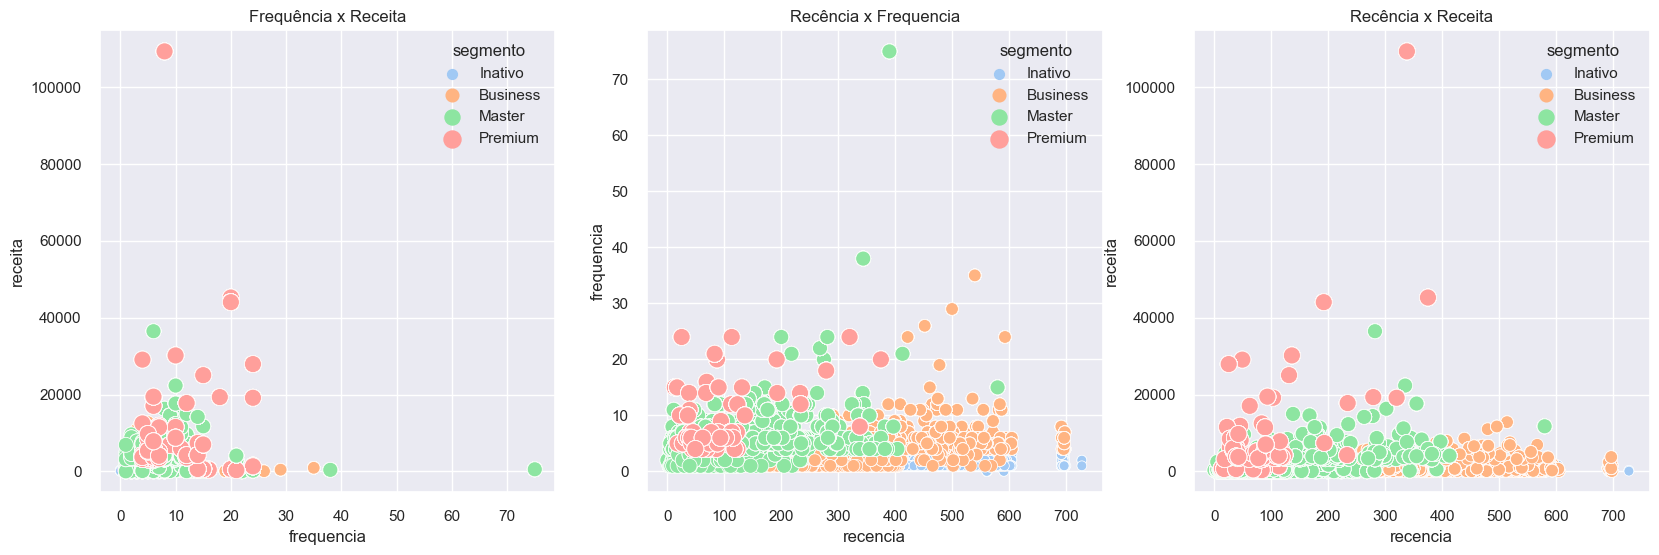

In [318]:
sns.set(palette='pastel', style='darkgrid')
plt.figure(figsize=(20,6))
plt.subplot(131)

ax1 = plt.subplot(1, 3, 1)
ax1 = plt.title('Frequência x Receita', fontsize=12)
ax1 = sns.scatterplot(x='frequencia', y='receita', data=df_final, hue='segmento', size='segmento',
                    sizes=(50,150), size_order=['Premium','Master', 'Business', 'Inativo'])

ax1 = plt.subplot(1, 3, 2)
ax1 = plt.title('Recência x Frequencia', fontsize=12)
ax2 = sns.scatterplot(x='recencia', y='frequencia', data=df_final, hue='segmento', size='segmento',
                    sizes=(50,150), size_order=['Premium','Master', 'Business', 'Inativo'])

ax1 = plt.subplot(1, 3, 3)
ax1 = plt.title('Recência x Receita', fontsize=12)
ax3 = sns.scatterplot(x='recencia', y='receita', data=df_final, hue='segmento', size='segmento',
                    sizes=(50,150), size_order=['Premium','Master', 'Business', 'Inativo'])

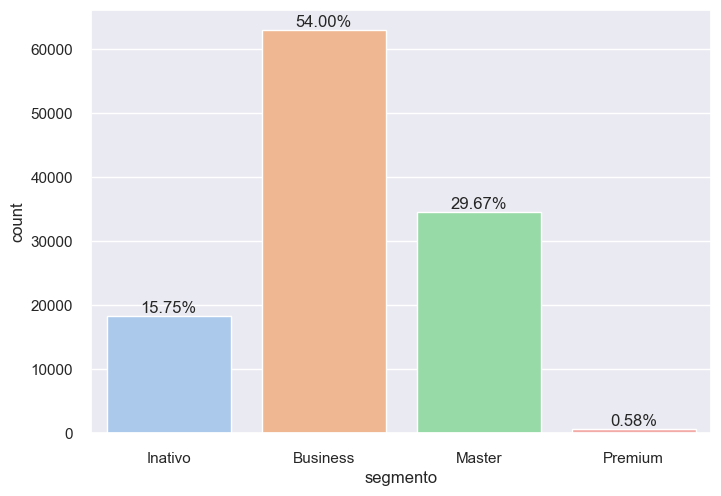

In [343]:
ax = sns.countplot(x=df_final['segmento']);

total = len(df_final['segmento'])
counts = [float(c.get_height()) for c in ax.patches]
percentages = [(count / total) * 100 for count in counts]

for i, patch in enumerate(ax.patches):

    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    ax.text(x, y, f'{percentages[i]:.2f}%', ha='center', va='bottom');

In [333]:
df_final['segmento_amplo'] = 'Inativo'

C:\Users\johnn\AppData\Local\Temp\ipykernel_2976\690146122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['segmento_amplo'] = 'Inativo'


In [334]:
df_final.loc[(df_final['recencia_cluster'] ==0) &
             (df_final['frequencia_cluster']==3) &
             (df_final['receita_cluster']==3 ), 'segmento_amplo'] = 'Campeoes'

df_final.loc[(df_final['recencia_cluster'] ==1)  & 
             (df_final['frequencia_cluster'] ==3) &
             (df_final['receita_cluster']==3), 'segmento_amplo'] = 'fieis'

df_final.loc[(df_final['recencia_cluster'] >=1) &
             (df_final['frequencia_cluster'] >=2) &
             (df_final['receita_cluster']>=2), 'segmento_amplo'] = 'potencialmente fieis'

df_final.loc[(df_final['recencia_cluster'] == 0) & 
             (df_final['frequencia_cluster'] ==0) & 
             (df_final['receita_cluster'] ==0), 'segmento_amplo'] = 'novos clientes'

df_final.loc[(df_final['recencia_cluster'] == 0) &
             (df_final['frequencia_cluster'] ==1) & 
             (df_final['receita_cluster'] ==1), 'segmento_amplo'] = 'promissores'

df_final.loc[(df_final['recencia_cluster'] ==2) & 
             (df_final['frequencia_cluster'] ==2) & 
             (df_final['receita_cluster'] ==2), 'segmento_amplo'] = 'precisam atencao'

df_final.loc[(df_final['recencia_cluster'] ==2) &
             (df_final['frequencia_cluster'] ==1) & 
             (df_final['receita_cluster'] ==1), 'segmento_amplo'] = 'quase em risco'

df_final.loc[(df_final['recencia_cluster'] ==3) & 
             (df_final['frequencia_cluster'] ==2) & 
             (df_final['receita_cluster'] ==2), 'segmento_amplo'] = 'de risco'

df_final.loc[(df_final['recencia_cluster'] ==3) & 
             (df_final['frequencia_cluster'] ==3) & 
             (df_final['receita_cluster'] ==3), 'segmento_amplo'] = 'nao pode perder'

df_final.loc[(df_final['recencia_cluster'] == 3)  &
             (df_final['frequencia_cluster'] ==1) &
             (df_final['receita_cluster'] ==1), 'segmento_amplo'] = 'hibernando'

df_final.loc[(df_final['recencia_cluster'] ==3) & 
             (df_final['frequencia_cluster'] ==0) & 
             (df_final['receita_cluster'] ==0), 'segmento_amplo'] = 'perdidos'


In [335]:
df_final.groupby('segmento_amplo')['id_unico_cliente'].count()

segmento_amplo
Inativo                 68108
de risco                   24
hibernando                320
novos clientes          18361
perdidos                29147
potencialmente fieis       62
precisam atencao           35
promissores               136
quase em risco            388
Name: id_unico_cliente, dtype: int64

In [336]:
df_final['segmento_amplo'].value_counts()

segmento_amplo
Inativo                 68108
perdidos                29147
novos clientes          18361
quase em risco            388
hibernando                320
promissores               136
potencialmente fieis       62
precisam atencao           35
de risco                   24
Name: count, dtype: int64

In [337]:
df_final

,id_unico_cliente,recencia,frequencia,receita,recencia_cluster,frequencia_cluster,receita_cluster,pontuacao,segmento,segmento_amplo
0,861eff4711a542e4b93843c6dd7febb0,474,1,146.87,0,0,0,0,Inativo,novos clientes
1,3c799d181c34d51f6d44bbbc563024db,483,1,140.61,0,0,0,0,Inativo,novos clientes
2,567ab47ca4deb92d46dbf54dce07d0a7,528,1,142.05,0,0,0,0,Inativo,novos clientes
3,f40ab89b622248b7ca125af4b486b887,474,1,155.70,0,0,0,0,Inativo,novos clientes
4,749943913a9851a39c9baf51877fbab6,533,1,148.33,0,0,0,0,Inativo,novos clientes
...,...,...,...,...,...,...,...,...,...,...
116576,0a0a92112bd4c708ca5fde585afaa872,338,8,109312.64,1,1,3,5,Premium,Inativo
116577,0a0a92112bd4c708ca5fde585afaa872,338,8,109312.64,1,1,3,5,Premium,Inativo
116578,0a0a92112bd4c708ca5fde585afaa872,338,8,109312.64,1,1,3,5,Premium,Inativo
116579,0a0a92112bd4c708ca5fde585afaa872,338,8,109312.64,1,1,3,5,Premium,Inativo
